# fun with random walks
the code implemented for running the random walk simulation can be found in [this file](https://github.com/michaelneuder/numerical_experiments/blob/master/random_walk/random_walk_3d.py). This notebook is to explore the relationship of final distance from home as a function of number of steps taken in the random walk. Step is determined by x,y,z distances each drawn from a random normal distribution with $ \mu = 0, \sigma = 1$.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random_walk_3d import *
import pandas as pd
plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams["font.size"] = "20"

def moving_average(data, window) :
    res = np.cumsum(data, dtype=float)
    res[window:] = res[window:] - res[:-window]
    return res[window - 1:] / window

in the random walk file I wrote and imported, there are two simulations: a graphical and non-graphical. first take a look at the graphical implementation. it plots the path of each walker on a 3d axes.

walker id: 0 -- steps taken: 10000 -- current location: <-105.027, 15.140, -10.860> distance from home = 106.6669
walker id: 1 -- steps taken: 10000 -- current location: <52.615, 17.754, 67.063> distance from home = 87.0691
walker id: 2 -- steps taken: 10000 -- current location: <1.835, -84.853, -121.443> distance from home = 148.1615
walker id: 3 -- steps taken: 10000 -- current location: <-239.721, 102.537, 88.754> distance from home = 275.4222
walker id: 4 -- steps taken: 10000 -- current location: <116.301, 24.394, -185.912> distance from home = 220.6445
walker id: 5 -- steps taken: 10000 -- current location: <-111.416, 8.758, 107.056> distance from home = 154.7617
walker id: 6 -- steps taken: 10000 -- current location: <-275.390, -22.406, 173.883> distance from home = 326.4616
walker id: 7 -- steps taken: 10000 -- current location: <71.110, -190.219, 75.573> distance from home = 216.6823
walker id: 8 -- steps taken: 10000 -- current location: <-31.352, 103.229, -90.041> distance f

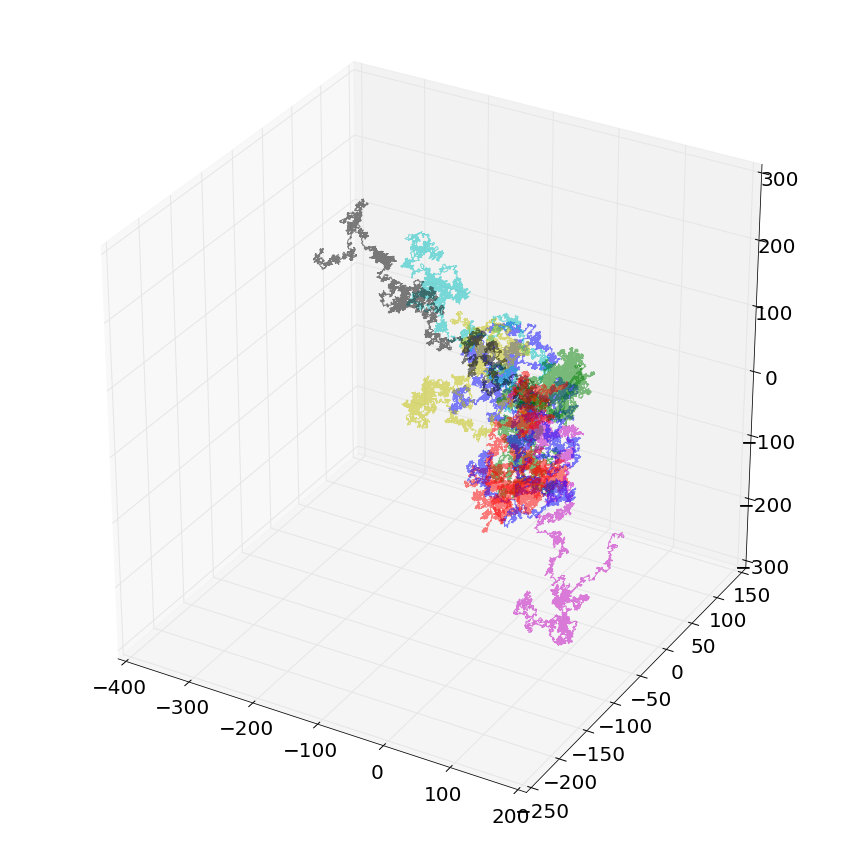

In [3]:
num_walkers = 10
num_steps = 10000
sim = simulation(num_walkers, num_steps)

i think this looks really cool and it is fun to play around with the graphics, but it is a bit more interesting to explore these results with a more quantitative lense. the non-graphical implementation does the exact same thing as the graphical, but can go faster due to not plotting each walkers entire path history. the main relationship to explore is distance from home (0,0,0) as a function of step count. this value is extremely difficult to come by analytically due to the fact that the walker has an infinite number of options for each step as far as direction and distance. so this is what i want to explore.

In [16]:
distances = np.arange(1,10000)
num_walkers = 20
mean_distances = []
for distance in distances:
    if distance % 1000 == 0:
        print('simulating random walk with {} steps'.format(distance))
    current_sim = simulation_non_graphical(num_walkers, distance)
    mean_distances.append(current_sim.get_distances().mean())

simulating random walk with 1000 steps
simulating random walk with 2000 steps
simulating random walk with 3000 steps
simulating random walk with 4000 steps
simulating random walk with 5000 steps
simulating random walk with 6000 steps
simulating random walk with 7000 steps
simulating random walk with 8000 steps
simulating random walk with 9000 steps


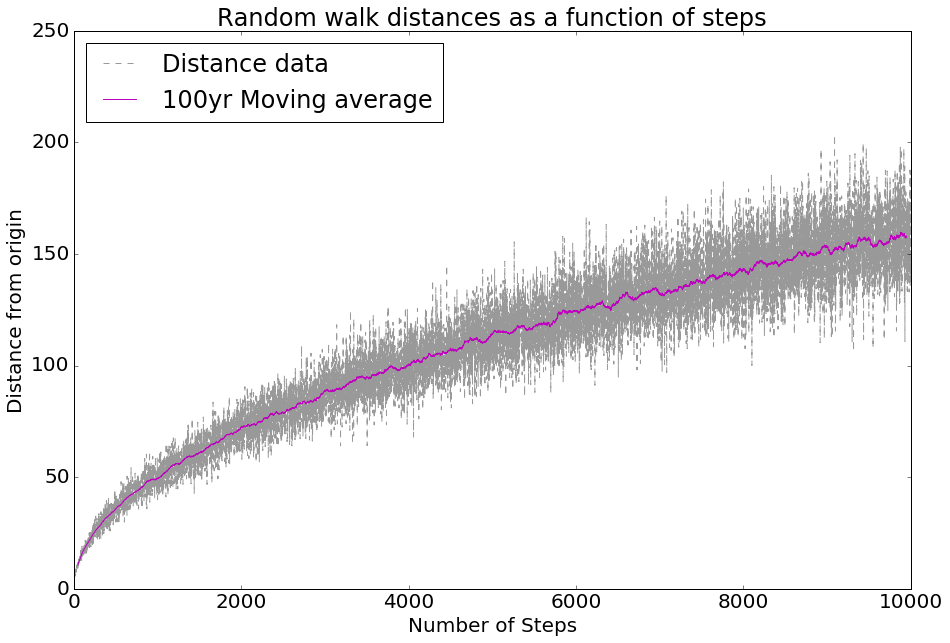

In [26]:
plt.plot(distances, mean_distances, 'k--', alpha=.4, label='Distance data')
x_avg, y_avg = moving_average(distances,100), moving_average(mean_distances,100)
plt.plot(x_avg, y_avg, 'm', label='100yr Moving average')
plt.xlabel('Number of Steps')
plt.ylabel('Distance from origin')
plt.title('Random walk distances as a function of steps')
plt.legend(loc=2)
plt.show()